In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import  MultiOutputRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import  train_test_split
from subfunc import plot_feature_importance

In [9]:
DATA_PATH = 'data/'

data_train = pd.read_csv(f'{DATA_PATH}train.csv',sep='\t', index_col='index')
data_test = pd.read_csv(f'{DATA_PATH}test.csv', sep='\t', index_col='index')

Наша обучающая выборка

In [10]:
data_train

,DT,t вып-обр,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,...,ПРОФИЛЬ_ОР65,ПРОФИЛЬ_Р50,ПРОФИЛЬ_Р65,ПРОФИЛЬ_Рельсы трамвайные,ПРОФИЛЬ_Шар заг d шара 100 мм 2 гр.,"ПРОФИЛЬ_Шар заг d шара 80-100 мм 2,3 гр.",ПРОФИЛЬ_Шар заг d шара 80-100 мм 4 гр.,ПРОФИЛЬ_Шары мелющие d 80-100 мм,ПРОФИЛЬ_Швеллер 40У,ПРОФИЛЬ_Швеллер 40У (12 категория)
index,,,,,,,,,,,,,,,,,,,,,
67,53.0,38.0,56.716667,2.980263,0.015240,0.125202,0.022209,0.048741,0.039700,1575.0,...,0,0,1,0,0,0,0,0,0,0
70,43.0,58.0,102.066667,2.102707,0.450520,0.254024,0.251131,0.268233,0.039512,1603.0,...,0,0,1,0,0,0,0,0,0,0
82,273.0,17.0,62.550000,5.088442,0.534800,0.110152,0.168386,0.128527,0.039541,1513.0,...,0,0,1,0,0,0,0,0,0,0
83,75.0,20.0,47.016667,3.107531,0.541855,0.143310,0.234872,0.208873,0.042392,1602.0,...,0,0,1,0,0,0,0,0,0,0
84,59.0,15.0,51.900000,2.556590,0.533385,0.148930,0.247852,0.222789,0.043333,1619.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,46.0,41.0,42.166667,3.380628,0.537080,0.105640,0.128626,0.101552,0.092195,1552.0,...,0,0,1,0,0,0,0,0,0,0
7037,55.0,36.0,46.383333,3.076996,0.555875,0.122876,0.156558,0.155113,0.092024,1576.0,...,0,0,1,0,0,0,0,0,0,0
7038,49.0,42.0,47.100000,2.263004,0.548385,0.111756,0.124018,0.120513,0.093503,1600.0,...,0,0,1,0,0,0,0,0,0,0


Наша целевая выборка

In [11]:
data_test

,DT,t вып-обр,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,...,ПРОФИЛЬ_ОР65,ПРОФИЛЬ_Р50,ПРОФИЛЬ_Р65,ПРОФИЛЬ_Рельсы трамвайные,ПРОФИЛЬ_Шар заг d шара 100 мм 2 гр.,"ПРОФИЛЬ_Шар заг d шара 80-100 мм 2,3 гр.",ПРОФИЛЬ_Шар заг d шара 80-100 мм 4 гр.,ПРОФИЛЬ_Шары мелющие d 80-100 мм,ПРОФИЛЬ_Швеллер 40У,ПРОФИЛЬ_Швеллер 40У (12 категория)
index,,,,,,,,,,,,,,,,,,,,,
0,52.0,29.0,41.033333,2.980263,0.456460,0.059572,0.117446,0.104762,0.040938,1557.0,...,0,0,1,0,0,0,0,0,0,0
1,53.0,26.0,44.066667,2.980263,0.359285,0.083738,0.160923,0.110327,0.040083,1601.0,...,0,0,1,0,0,0,0,0,0,0
2,53.0,24.0,43.350000,2.980263,0.331665,0.081490,0.132332,0.139860,0.041622,1593.0,...,0,0,1,0,0,0,0,0,0,0
3,58.0,17.0,46.183333,2.980263,0.377945,0.133194,0.221605,0.165186,0.042050,1589.0,...,0,0,1,0,0,0,0,0,0,0
4,52.0,20.0,48.500000,2.980263,0.389875,0.105094,0.169459,0.143024,0.040967,1597.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,50.0,33.0,50.883333,2.980263,0.405885,0.137710,0.074810,0.116730,0.038542,1543.0,...,0,0,1,0,0,0,0,0,0,0
2213,53.0,38.0,46.700000,2.980263,0.298320,0.107824,0.046955,0.058302,0.037384,1571.0,...,0,0,1,0,0,0,0,0,0,0
2214,54.0,45.0,46.200000,2.980263,0.456665,0.104894,0.074307,0.123786,0.038282,1559.0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
target_list = ['химшлак последний Al2O3', 'химшлак последний CaO', 'химшлак последний R', 'химшлак последний SiO2']

Деление выборок на обучающие признаки и целевые

In [13]:
data_train_marked = data_train.drop(columns=target_list)
target_train = data_train[target_list]

data_test_non_marked = data_train.drop(columns=target_list)
target_test = data_train[target_list]

In [14]:
np.random.seed(42)

best_score = 0
best_model = None
for n_estimators in (100,200,300,400):
    for loss in ('ls','lad','huber'):
        mult_model  = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=n_estimators,loss=loss))
        mult_model.fit(data_train_marked, target_train)
        cur_score = r2_score(target_test,mult_model.predict(data_test_non_marked))
        if cur_score > best_score:
            best_score = cur_score
            best_model = mult_model


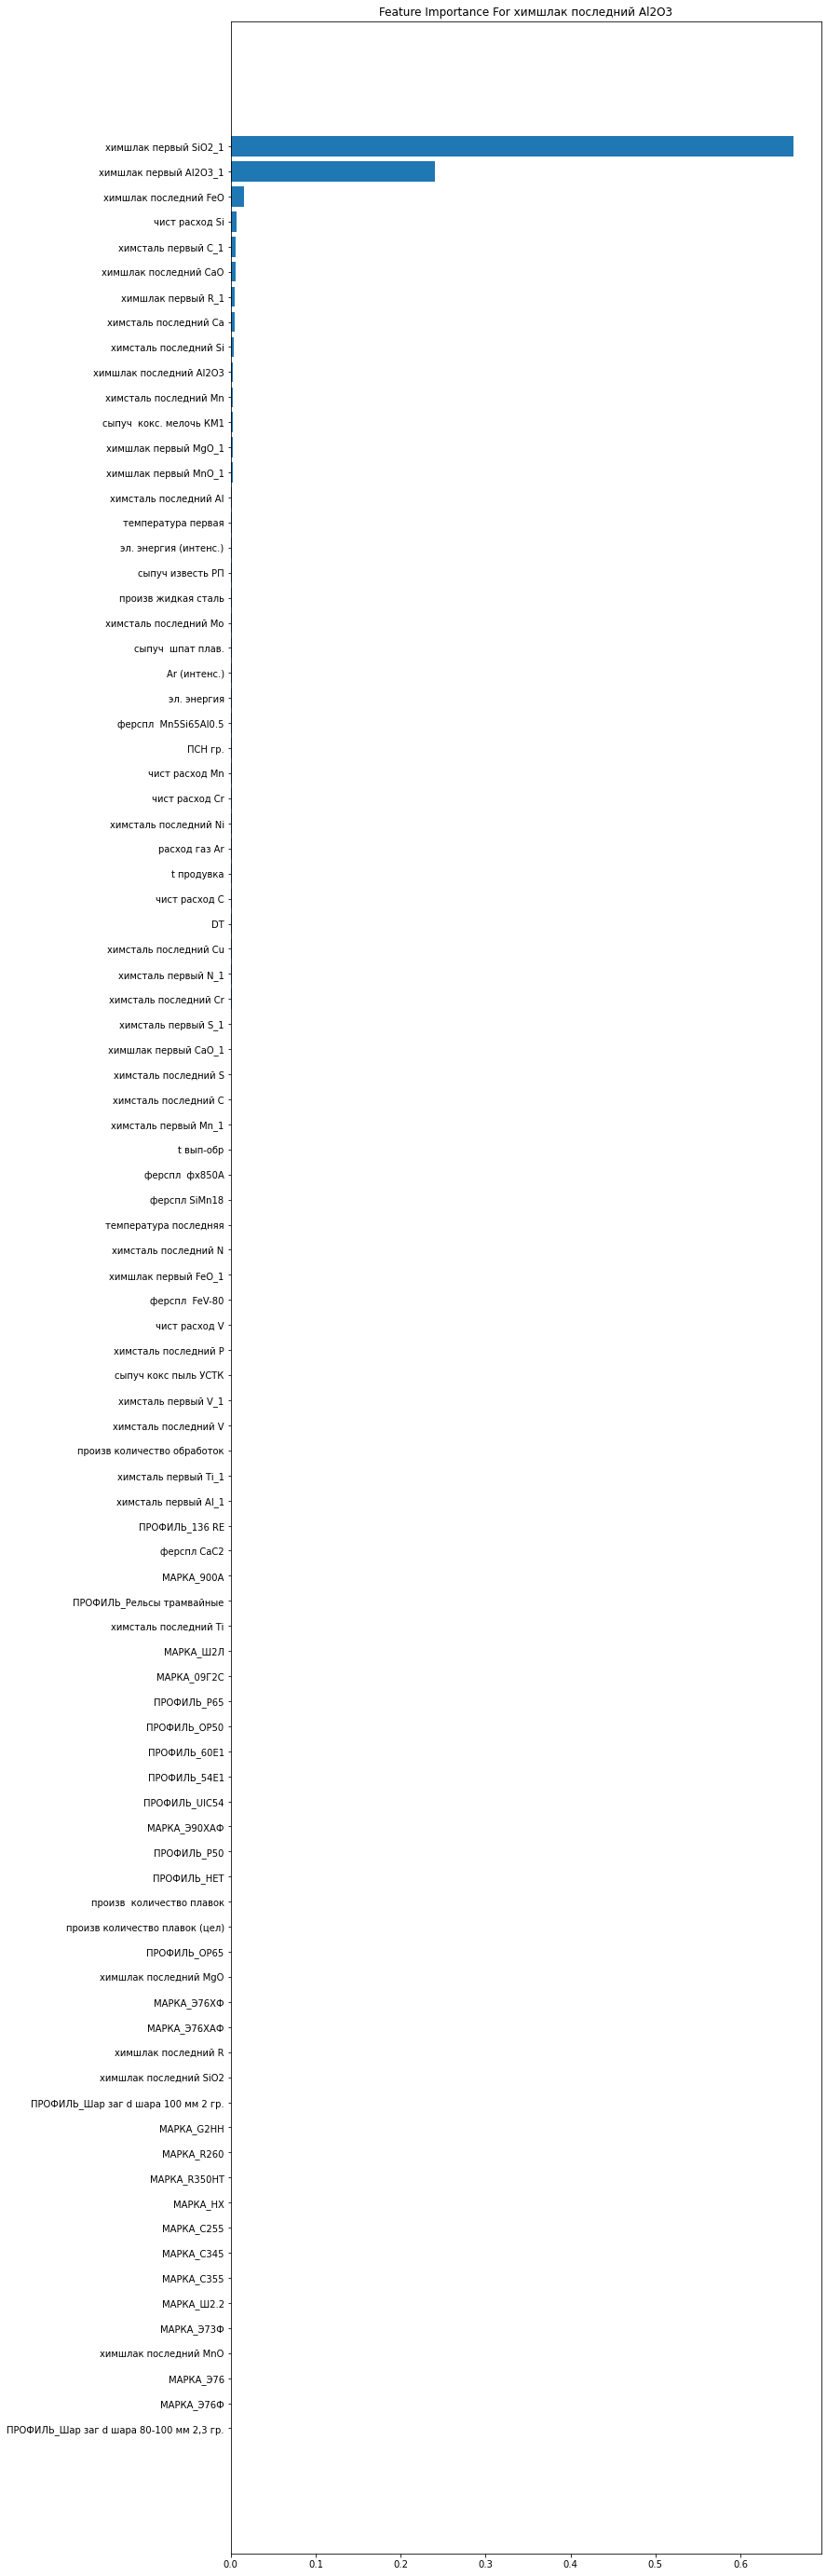

In [15]:
plot_feature_importance(best_model, data_train, 0, 'Feature Importance For химшлак последний Al2O3')

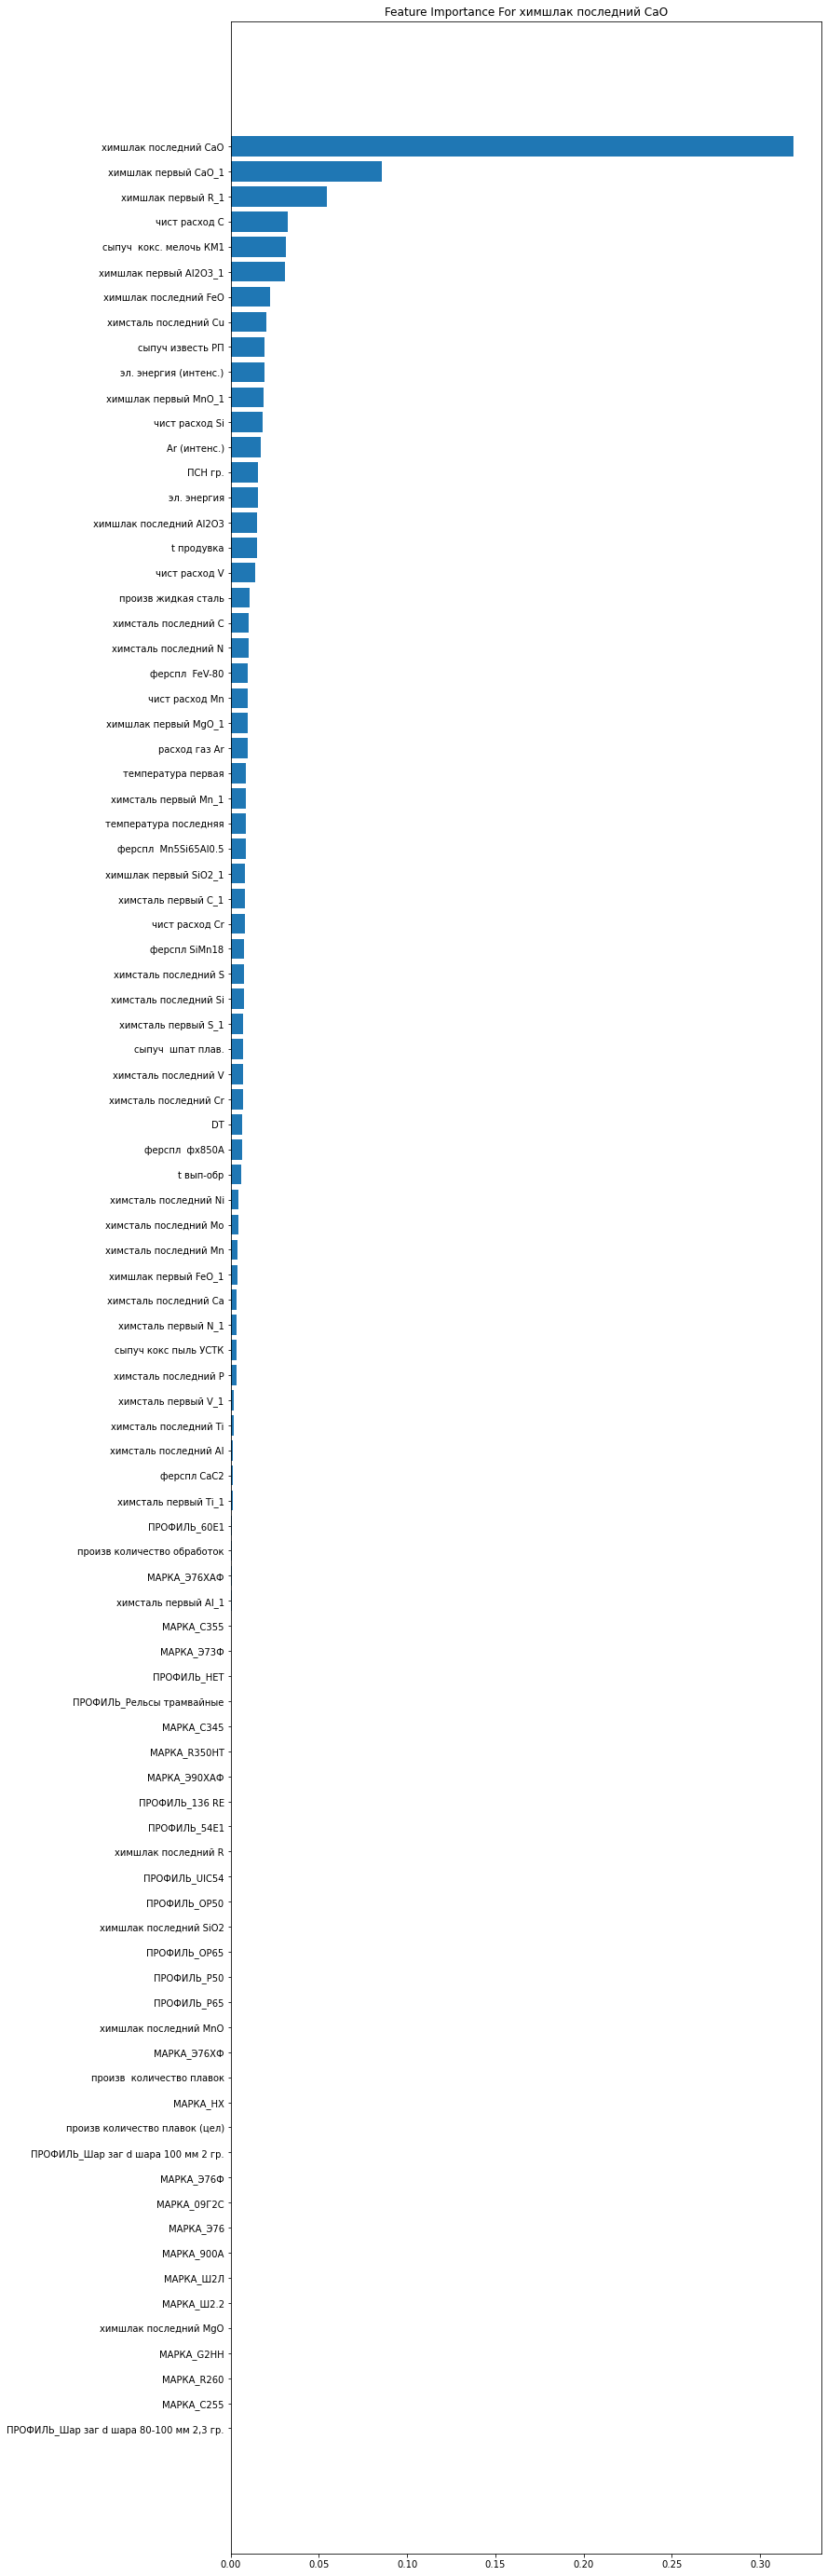

In [16]:
plot_feature_importance(best_model, data_train, 1, 'Feature Importance For химшлак последний CaO')

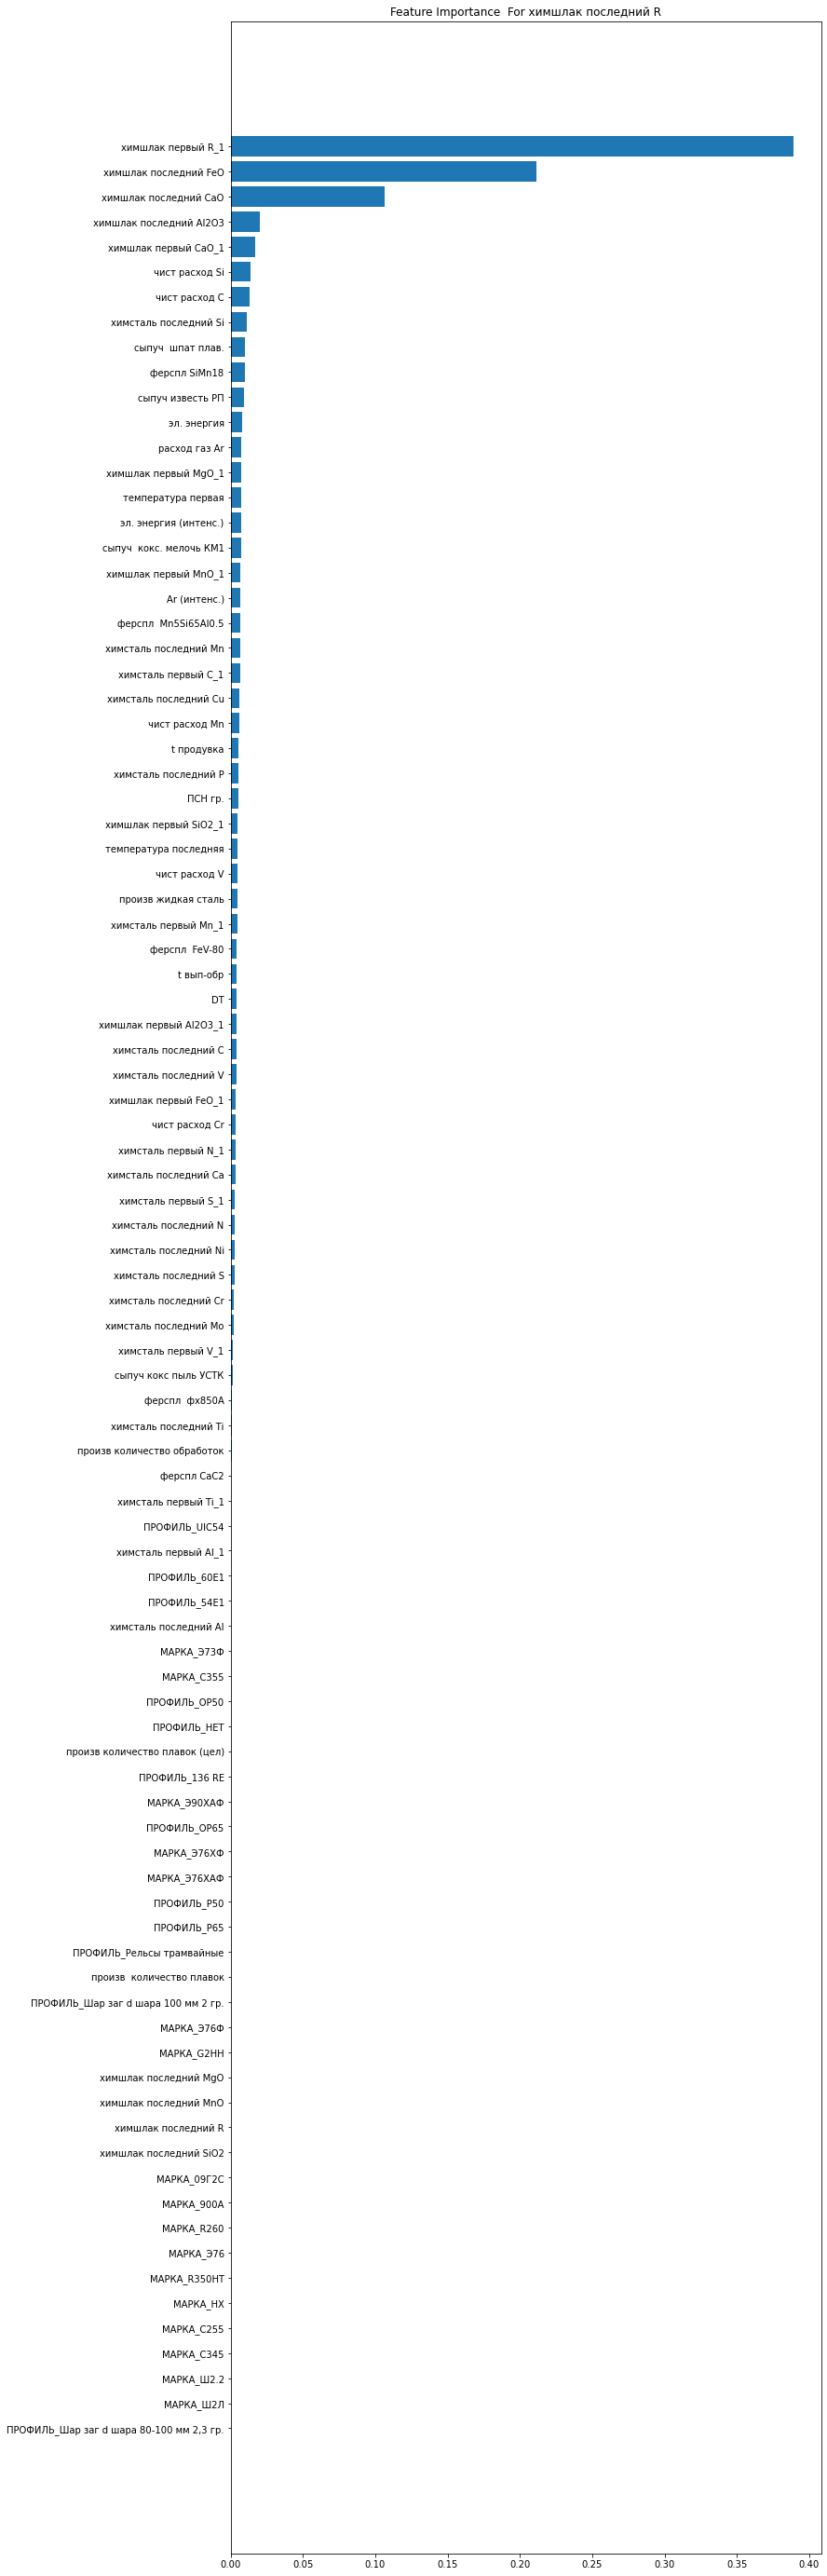

In [17]:
plot_feature_importance(best_model, data_train, 2, 'Feature Importance  For химшлак последний R')

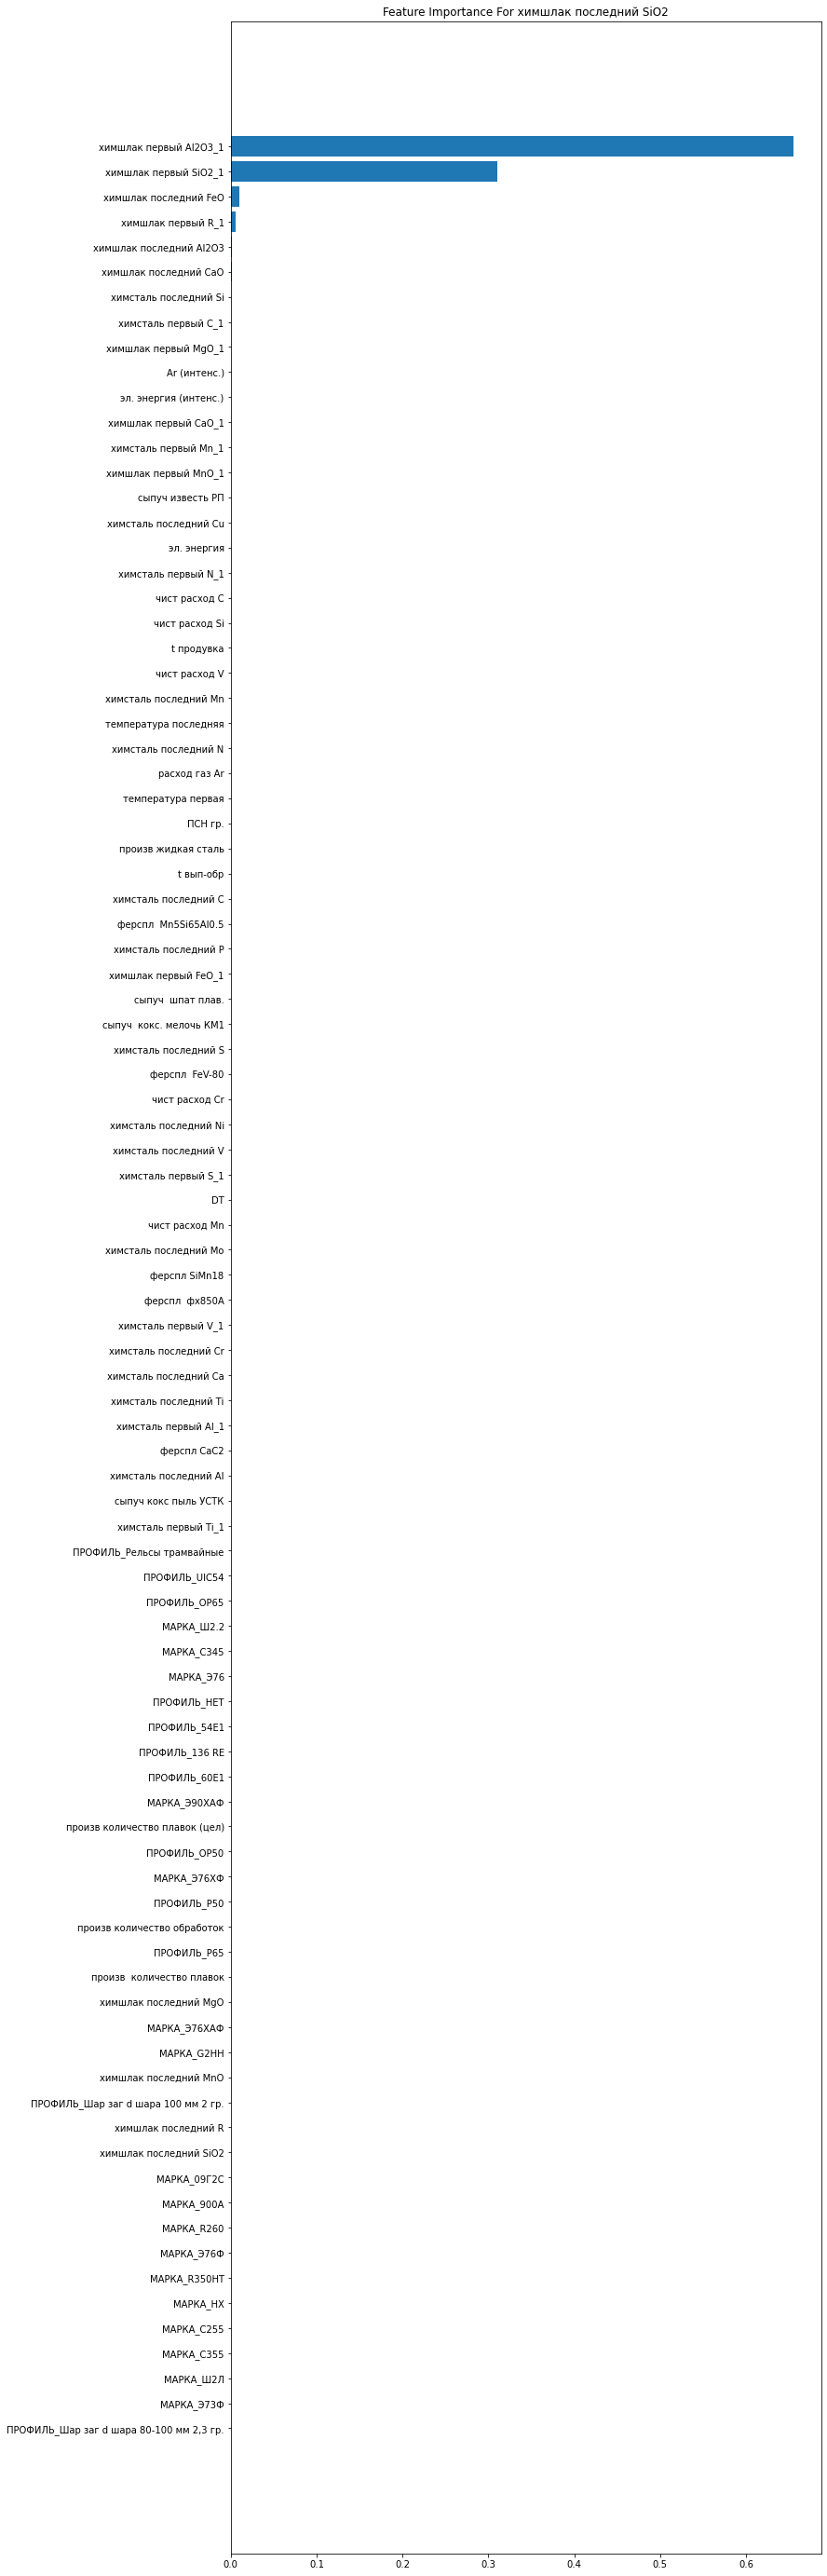

In [18]:
plot_feature_importance(best_model, data_train, 3, 'Feature Importance For химшлак последний SiO2')

In [19]:
best_score

0.822872951893332